In [ ]:
# default_exp bilateral

# Bilateral Filter

# Task 4: Bilateral Filter with Gaussian Kernels
> whatisit

Implementujte bilaterální filtr s Gaussovskými jádry (prostorové a jasové) s volitelným rozptylem. Filtr aplikujte na vstupní obraz a postupně měňte rozptyl jak u prostorové, tak i jasové funkce. Výsledek uložte do souboru. Demonstrujte jednoduchou aplikaci bilaterálního filtru na potlačení šumu v obraze při zachování ostrých hran.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

from dzotools.utils import imgload, arr2img
from dzotools.fourier import draw_pair

catpic = imgload('data/catpic.png', convert="L")
transgas = imgload('data/transgas.png', convert="L")

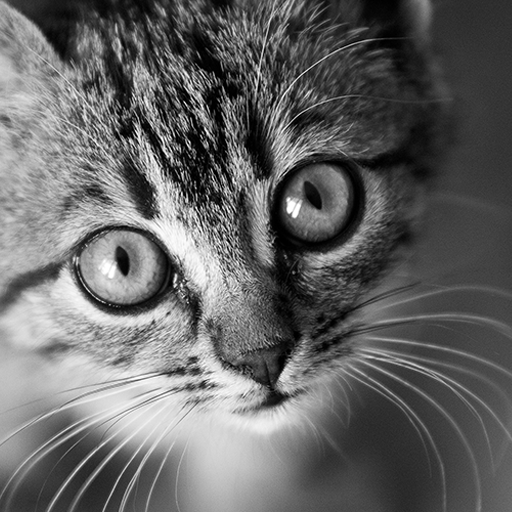

In [ ]:
arr2img(catpic)

In [ ]:
from dzotools.convolution import gauss1D, gauss2D

gauss1 = gauss1D(3)
gauss2 = gauss2D(3)

In [ ]:
def point_gauss(x: np.array, sigma: float) -> np.array:
    """Get the value of gaussian in point. Vectorized for np array."""
    return np.exp(-(x - 0.0)**2 / (2 * sigma**2)) / (2*np.pi*np.sqrt(sigma))

In [ ]:
g_sigma = 10
b_sigma = 150

pad = "constant"
arr = transgas.copy()

gauss2 = gauss2D(g_sigma)

# halfwidth not including the center <hw, c, hw>
hw = gauss2.shape[0] // 2

padded = np.pad(arr, pad_width=(hw, hw), mode=pad)
result = np.zeros_like(padded, dtype="float32")

step_count = np.prod(arr.shape)
with tqdm(total=step_count) as progress:
    for s in range(hw, arr.shape[0] + hw):
        for t in range(hw, arr.shape[1] + hw):
            progress.update(1)
            
            center = padded[s, t]
            window = padded[s-hw: s+hw+1, t-hw: t+hw+1]
            
            bfilter = point_gauss(center - window, b_sigma)
            result[s, t] = np.sum(window * gauss2 * bfilter)

100%|██████████| 256036/256036 [00:27<00:00, 9284.78it/s]


In [ ]:
catpic.shape

(512, 512)

In [ ]:
result.shape

(566, 566)

In [ ]:
transgas.shape

(506, 506)

(<Figure size 720x720 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

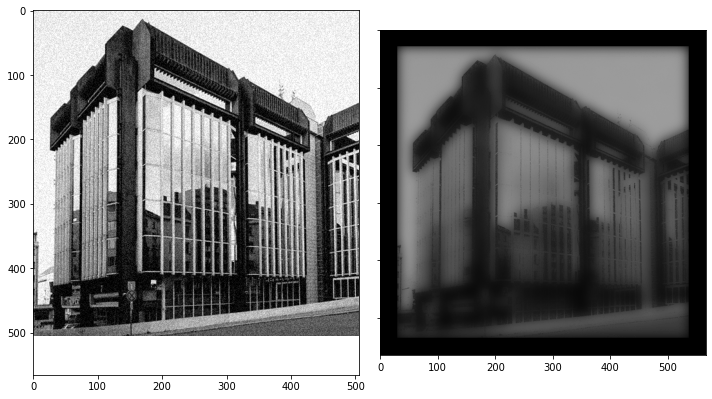

In [ ]:
draw_pair(transgas, result*50)